# Assignment 4: Permutation test 1
## Learning Outcomes
By completing this assignment, you will be able to implement and use randomization tests to determine whether a specific effect is statistically significant. Randomization tests are a highly universal and powerful way to do this, and form an essential part of the toolkit of any Data Scientist. 

## Problem Description
An increasingly common statistical tool for determining whether a difference is significant is the randomization or permutation test. A randomization test builds - rather than assumes – a sampling distribution of the test statistics. This is achieved by exchanging or permuting variables which are “exchangeable” under the Null-hypothesis. A randomization test gives a simple way to compute the sampling distribution for any test statistic under the null hypothesis that the dependent variable is statistically not dependent on the shuffled variable. 
In this assignment, we continue with the movie dataset from last week. This week your main task is to determine whether the difference in proportion for female vs. male directors to direct action movies is significant. 
You are allowed to use standard numpy and pandas functions such as mean, groupby, shuffle. But you are not allowed to use a permutation functions that have been already been designed. Numeric calculations in python that are printed should be rounded to 6 decimal places. 

Methods that you may find beneficial. 
Pandas: crosstab, iloc. Numpy: random.shuffle, reset_index, matplotlib: hist, axvline 

## Preliminaries 
Import pandas, numpy, matplotlib, and load the dataset file

In [74]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('movieDataset.csv')

,Unnamed: 0,boxoff,prodcost,dirIncome,dirGender,year,month,genre,numTheatres
0,0,88.648583,44.742936,1.143234,male,2012,3,comedy,139
1,1,145.334924,38.835516,3.393535,female,2014,11,drama,213
2,2,238.265684,29.532283,2.418883,male,2015,6,other,100
3,3,212.714742,157.111899,2.034115,male,2014,10,adventure,436
4,4,120.175461,30.547155,0.963219,female,2012,1,comedy,115
...,...,...,...,...,...,...,...,...,...
245,245,187.231562,72.743712,3.105438,male,2012,12,adventure,366
246,246,215.713195,136.851707,1.917771,male,2013,7,adventure,285
247,247,166.827002,50.684470,2.414571,male,2014,1,other,233
248,248,223.226998,40.103513,2.176928,male,2015,2,drama,489


## TASK 1: Defining the test statistics (40pts)
### Question 1 - Create contingency table of adventure (yes/no) by director gender (10pts)
Generate a cross-tabulation table of the 2x2 proportions of directorGender vs. whether the movie is an adventure or not (all other genres should be combined into non-adventure movies).

In [50]:
ctable = pd.crosstab(df['dirGender'], df['genre'] == 'adventure')
ctable.columns = ['non-adventure movies','adventure movies']
ctable.columns.name = 'genre'
ctable

genre,non-adventure movies,adventure movies
dirGender,,
female,31,6
male,155,58


### Question 2 - Calculate p(adventure|female)-p(adventure|male) (20pts)
Calculate the probability that the movie is an adventure given that the director Gender is female, p(adventure|female), the probability of the movie is an adventure given that the director Gender is male, p(adventure|male), as well as the difference between these two numbers, p(adventure|female)- p(adventure|male) (for help, see solution to homework 2).

In [82]:
ctable = pd.crosstab(df['dirGender'], df['genre'] == 'adventure',margins=True)
ctable.columns = ['non-adventure movies','adventure movies','All']
ctable.columns.name = 'genre'

advGivenFe = ctable['adventure movies'][0] / ctable['All'][0]

advGivenM = ctable['adventure movies'][1] / ctable['All'][1]

dif = advGivenFe-advGivenM

print('The probability that the movie is an adventure given that the director Gender is female is',advGivenFe)
print('The probability that the movie is an adventure given that the director Gender is male is',advGivenM)
print('The difference is',dif)

The probability that the movie is an adventure given that the director Gender is female is 0.16216216216216217
The probability that the movie is an adventure given that the director Gender is male is 0.27230046948356806
The difference is -0.11013830732140589


### Question 3 - Define a function that calculates the difference in average income by gender (10pts)
Write a function (e.g., https://www.tutorialspoint.com/python/python_functions.htm) that takes the data frame as an input and returns the difference between the average income of male directors in adventure and the average income of female directors in adventure.

In [81]:
def avgIncomeByGender(df):
    dfg = df.groupby('dirGender')
    return dfg['dirIncome'].mean()[1] - dfg['dirIncome'].mean()[0]
    
avgIncomeByGender(df)

0.6390446473389162

## Task 2: Perform a permutation test (60pts)
### Question 1 (10pts)
Written answer: We want to test the hypothesis that female directors of adventure movies earn less, on average, than male directors of adventure movies. What is the Null-hypothesis we need to consider? 

> The null hypothesis, H0, would be that the average income of female directors of adventure movies is equal to the average income of male directors of adventure movies.

### Question 2 (40pts)
Perform a permutation test. Under the Null-hypothesis the director gender is exchangeable. Write a function that takes the data frame as an input and then randomly permutes the directorGender column. For each iteration, the function then calls the function written for Task1, Q3 to get the test statistic. Each iteration, the test statistic should  be stored in a list. It is important to mention that the gender must be randomly assigned each time prior to calculating the difference of the conditional probabilities. 

After bulding up the numpy array of test statistics, the function should plot a histogram of the test statistics and mark the value of the empirical test statistics by a vertical line (see https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html). Finally, it should report the p-value. 

For Pseudo code see lecture. Start with 500 iterations to test your code – for the final result, use 5000 iterations.

The p value is 0.0812


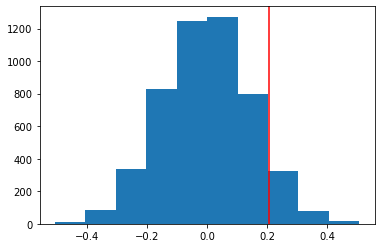

In [111]:
def permTest(df):
    numIter = 5000
    array = np.zeros(numIter)
    y = avgIncomeByGender(df)
    for i in range(numIter):
        df_copy = df.copy()
        shuff_var = np.random.randint(2, size=len(df_copy.index))
        df_copy["dirGender"] = shuff_var
        testStat = avgIncomeByGender(df_copy)
        array[i] = testStat
    plt.hist(array)
    plt.axvline(y,color='Red')
    print('The p value is',sum(array>=y)/len(array))
    
permTest(df)

### Question 3 (10pts)
Written response: What do you conclude from this result?


> At a traditional significance level of 0.05, we cannot reject the null hypothesis as the p value is greater than 0.05, so we cannot conclude that male directors of adventure movies make more than female. If we take a signifance level of 0.1 (or any significance level above 0.0812), the null hypothesis would be rejected and we could conclude that the male directors do make more.